In [2]:
import numpy as np
import matplotlib.pyplot as plt

from Matrica import Matrica

In [3]:
mat = Matrica()
mat.load_from_numpy(np.array([[1,4],[2,3]]))
print mat.inverse()

[[-0.6  0.8]
 [ 0.4 -0.2]]


In [122]:
def RungeKutta(A, B, x0, T, t_max, print_every=1):
    x = x0.copy();

    tt = T;
    cc = 0;
    
    sol = []
    timesteps = []
    sol.append(x.copy())
    timesteps.append(0)
    while (tt < t_max):
        m1 = np.dot(A,x) + B;
        m2 = np.dot(A,(x + (T / 2.)* m1)) + B;
        m3 = np.dot(A, (x + (T / 2.)* m2)) + B;
        m4 = np.dot(A, (x + (T* m3))) + B;

        x = x + T / 6. * (m1 + 2 * m2 + 2 * m3 + m4);

        if (cc % print_every == 0):
            print x;
            print
            
        sol.append(x.copy())
        timesteps.append(tt)
        cc+=1;
        tt += T;
    return timesteps, sol
        

def Trapez(A, B, x0, T, t_max, print_every=1):
    a_row = A.shape[0]
    I = np.zeros((a_row,a_row))
    x = x0.copy();
    
    for i in range(a_row):
        I[i, i] = 1;

    tt = T;
    cc = 0;
    
    sol = []
    timesteps = []
    sol.append(x.copy())
    timesteps.append(0)
    while(tt < t_max):
        temp1 = Matrica()
        temp1.load_from_numpy(I - T / 2. * A)
        inverz = temp1.inverse()
        
        m1 = np.dot(np.dot(inverz, (I + T / 2. * A)), x);
        m2 = np.dot(np.dot(T, inverz), B);
        x = m1 + m2;
        
        sol.append(x.copy())
        timesteps.append(tt)
        tt += T;

        if(cc % print_every == 0):
            print x;
            print
        
        cc+=1;
        
    return timesteps, sol

In [123]:
def visualize(timesteps, variables):
    vals = np.array(variables)
    size, _, _ = vals.shape
    x0 = vals[range(size),0,...]
    x1 = vals[range(size),1,...]
    plt.figure(figsize=(16,12))
    plt.subplot(2,2,1)
    plt.grid()
    plt.plot(timesteps,x0)
    plt.subplot(2,2,2)
    plt.plot(timesteps,x1)
    plt.grid()
    plt.show()

# 1. Zadatak

[[ 0.79551122]
 [-2.08977556]]

[[ 0.45118373]
 [ 2.19007608]]

[[-1.55672057]
 [-1.60518568]]



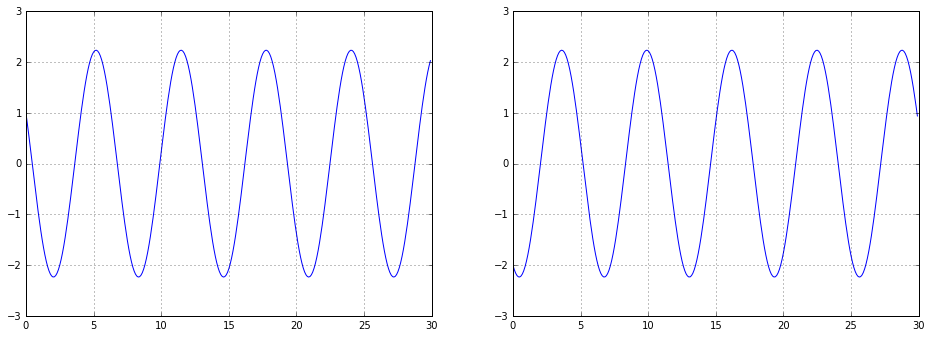

In [131]:
T = 0.1
iters = 300
A = np.array([[0,1],[-1,0]])
B= np.array([[0],[0]])
x0 = np.array([[1],[-2]])
timesteps, sols = Trapez(A,B,x0,T,T*iters,print_every=100)
visualize(timesteps, sols)

[[ 0.7953375 ]
 [-2.08984167]]

[[ 0.46955445]
 [ 2.18620942]]

[[-1.58331964]
 [-1.57895059]]



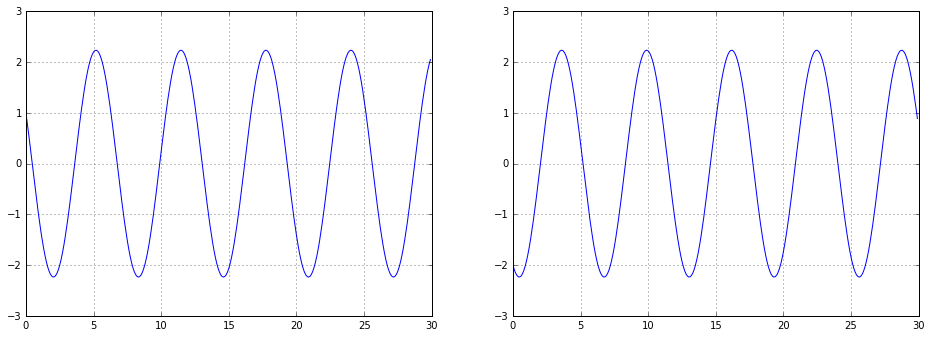

In [126]:
T = 0.1
iters = 300
A = np.array([[0,1],[-1,0]])
B= np.array([[0],[0]])
x0 = np.array([[1],[-2]])
timesteps, sols = RungeKutta(A,B,x0,T,T*iters,print_every=100)
visualize(timesteps, sols)

# 2. Zadatak

[[ 0.53846154]
 [-1.07692308]]



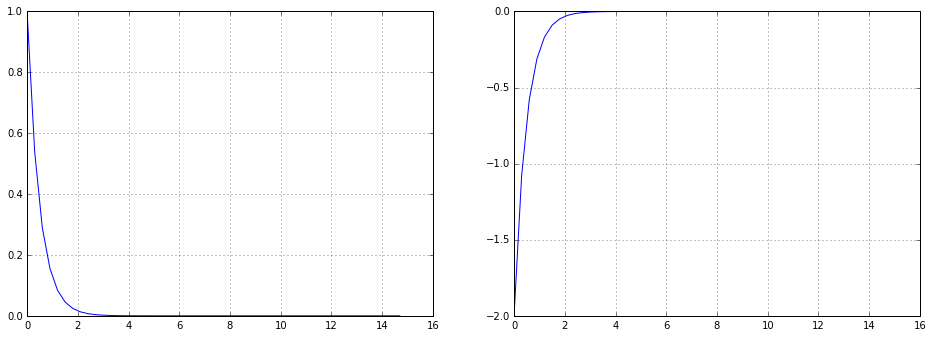

In [113]:
T = 0.3
iters = 50
A = np.array([[0,1],[-200,-102]])
B= np.array([[0],[0]])
x0 = np.array([[1],[-2]])
timesteps, sols = Trapez(A,B,x0,T,T*iters,print_every=100)
visualize(timesteps, sols)

[[ 0.98019867]
 [-1.96039735]]

[[ 0.13265547]
 [-0.26531093]]

[[ 0.01795297]
 [-0.03590593]]

[[ 0.00242967]
 [-0.00485934]]

[[ 0.00032882]
 [-0.00065764]]

[[  4.45009515e-05]
 [ -8.90019031e-05]]

[[  6.02254890e-06]
 [ -1.20450978e-05]]

[[  8.15063363e-07]
 [ -1.63012673e-06]]

[[  1.10306831e-07]
 [ -2.20613663e-07]]

[[  1.49284063e-08]
 [ -2.98568126e-08]]

[[  2.02034010e-09]
 [ -4.04068020e-09]]

[[  2.73423301e-10]
 [ -5.46846601e-10]]

[[  3.70038199e-11]
 [ -7.40076398e-11]]

[[  5.00792246e-12]
 [ -1.00158449e-11]]

[[  6.77748607e-13]
 [ -1.35549721e-12]]

[[  9.17232999e-14]
 [ -1.83446600e-13]]

[[  1.24133988e-14]
 [ -2.48267976e-14]]

[[  1.67997085e-15]
 [ -3.35994170e-15]]

[[  2.27359331e-16]
 [ -4.54718662e-16]]

[[  3.07697396e-17]
 [ -6.15394791e-17]]

[[  4.16423143e-18]
 [ -8.32846286e-18]]

[[  5.63567442e-19]
 [ -1.12713488e-18]]

[[  7.62705595e-20]
 [ -1.52541119e-19]]

[[  1.03220978e-20]
 [ -2.06441956e-20]]

[[  1.39694403e-21]
 [ -2.79388807e-21]]



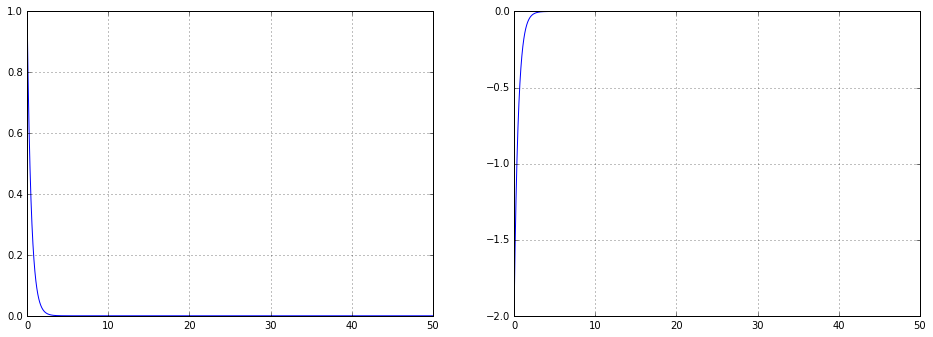

In [129]:
T = 0.01
iters = 5000
A = np.array([[0,1],[-200,-102]])
B= np.array([[0],[0]])
x0 = np.array([[1],[-2]])
timesteps, sols = RungeKutta(A,B,x0,T,T*iters,print_every=100)
visualize(timesteps, sols)

# Stabilnosti

### Pogreske  
$Q = $ stupanj algoritma  
lokalna = $T^{Q+1}$  
globalna = $T^{Q}$  

### Eulerov
**postupak prvog stupnja**  
$x_{k+1} = x_k + T *x_{k}^{'}$    
$|1+\lambda*T|\leq1$  

Uvijet stabilnosti = $T\leq-\frac{2\sigma}{|\lambda|^2}$

### Obrnuti Eulerov
**postupak prvog stupnja**  
$x_{k+1} = x_k + T *x_{k+1}^{'}$    
$|1-\lambda*T|\geq1$   

Uvijet stabilnosti = $T\ge\frac{2\sigma}{|\lambda|^2}$

### Trapezni
**postupak drugog stupnja**  
$x_{k+1} = x_k + \frac{T}{2} * (x_{k}^{'}+x_{k+1}^{'})$  

Uvijet stabilnosti = $\sigma\leq0$

### Heunov
**T zadan**
**postupak prvog stupnja**  
$\hat{x_{k+1}} = x_k + T *x_{k}^{'}$    
$x_{k+1} = x_k + T * (x_{k}^{'}+\hat{x_{k+1}^{'}})$

Uvijet stabilnosti = $|1+\lambda*T+\frac{(\lambda*T)^2}{2}|\leq1$

### Visekoracni
**Podrucje stabilnosti vrijedi ako se korektor iterira do konvergencije**
**Korektor mora biti višeg reda od prediktora**

In [88]:
from sympy import *

def power(z):
    return re(z)**2 + im(z)**2

def sigma_kroz_lambda(system_matrix):
    x = sy.symbols('x')
    n = system_matrix.shape[0]
    val = x*np.identity(n) - system_matrix
    val = sy.Matrix(val)
    sol = sy.solve(val.det(),x)
    index = 1
    print "Rjesenje determinante je:\n%s"%(val.det())
    print
    print "Vrijednosti Lambdi su\n%s" %(sol)
    print
    if len(sol)!=1:
        return (-2.*re(sol[index]))/power(sol[index])
    else:
        return (-2.*re(sol))/power(sol)


print sigma_kroz_lambda(np.array([[0,1],[-200,-102]]))
print sigma_kroz_lambda(np.array([[0,1],[-1,0]]))

Rjesenje determinante je:
1.0*x**2 + 102.0*x + 200

Vrijednosti Lambdi su
[-100.000000000000, -2.00000000000000]

1.00000000000000
Rjesenje determinante je:
1.0*x**2 + 1

Vrijednosti Lambdi su
[-1.0*I, 1.0*I]

0
